In [511]:
#Loan prediction is a classification problem

In [512]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [513]:
#lets read the csv file

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [514]:
#lets convert the csv file to dataframe

Loan=pd.DataFrame(data=df)
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [515]:
#Lets drop Loan_ID
Loan.drop(["Loan_ID"],axis=1,inplace=True)


In [516]:
Loan
##Its dropped

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [517]:
Loan.shape
#number of rowa are 614 and 12 columns

(614, 12)

In [518]:
Loan.dtypes
#the attributes have data types of objects, float and integers

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [519]:
Loan.describe()
#Standard deviation is the maximum for ApplicantIncome attribute and hence the spread of data would be most there.
#there is a difference between mean and median values hence there is some skewness expected to the right and left.
#there could be some outliers as there is some difference between the 75th percentile and maximum value

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [520]:
#lets check for the missing values if any

Loan.isnull().sum()
#Gender has 13 missing values, Married has 3 missing values,Dependents have 15 missing values,Self_Employed has 32 missing values
#LoanAmount has 22 missing values,Loan_Amount_Term has 14 missing values and Credit_History has 50 missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [521]:
#lets treat these missing values now

In [522]:
Loan["Gender"]=Loan.Gender.fillna(Loan["Gender"].mode()[0])

In [523]:
Loan["Married"]=Loan.Married.fillna(Loan["Married"].mode()[0])

In [524]:
Loan["Dependents"]=Loan.Dependents.fillna(Loan["Dependents"].mode()[0])

In [525]:
Loan["Self_Employed"]=Loan.Self_Employed.fillna(Loan["Self_Employed"].mode()[0])

In [526]:
Loan["LoanAmount"]=Loan.LoanAmount.fillna(Loan["LoanAmount"].median())

In [527]:
Loan["Loan_Amount_Term"]=Loan.Loan_Amount_Term.fillna(Loan["Loan_Amount_Term"].mode()[0])

In [528]:
Loan["Credit_History"]=Loan.Credit_History.fillna(Loan["Credit_History"].mode()[0])

In [529]:
Loan.isnull().sum()
#All missing values have been treated.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

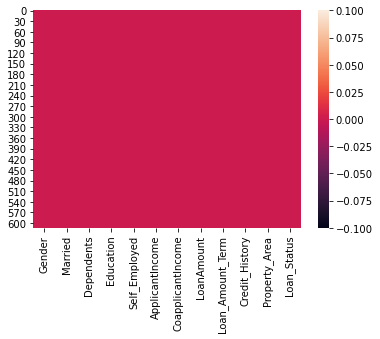

In [530]:
#Lets confirm with heatmap that all missing values have been treated
sns.heatmap(Loan.isnull())
#this confirms that all missing values have been treated

In [531]:
Loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [532]:
#lets use labelecoder where ever applicable
le1=LabelEncoder()
Loan["Gender"]=le1.fit_transform(Loan["Gender"])
print(Loan["Gender"].value_counts())

1    502
0    112
Name: Gender, dtype: int64


In [533]:
le2=LabelEncoder()
Loan["Married"]=le2.fit_transform(Loan["Married"])
print(Loan["Married"].value_counts())

1    401
0    213
Name: Married, dtype: int64


In [534]:
le3=LabelEncoder()
Loan["Education"]=le3.fit_transform(Loan["Education"])
print(Loan["Education"].value_counts())

0    480
1    134
Name: Education, dtype: int64


In [535]:
le4=LabelEncoder()
Loan["Self_Employed"]=le4.fit_transform(Loan["Self_Employed"])
print(Loan["Self_Employed"].value_counts())

0    532
1     82
Name: Self_Employed, dtype: int64


In [536]:
le5=LabelEncoder()
Loan["Property_Area"]=le5.fit_transform(Loan["Property_Area"])
print(Loan["Property_Area"].value_counts())

1    233
2    202
0    179
Name: Property_Area, dtype: int64


In [537]:
le6=LabelEncoder()
Loan["Loan_Status"]=le6.fit_transform(Loan["Loan_Status"])
print(Loan["Loan_Status"].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [538]:
le7=LabelEncoder()
Loan["Dependents"]=le7.fit_transform(Loan["Dependents"])
print(Loan["Dependents"].value_counts())

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='Density'>

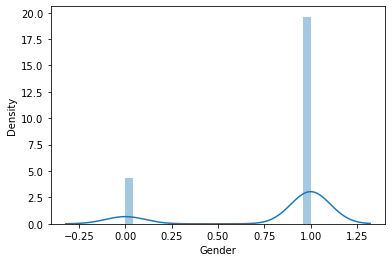

In [539]:
#lets perform univarite analysis
sns.distplot(Loan["Gender"])
#Skewness is present to the right

<AxesSubplot:xlabel='Gender', ylabel='count'>

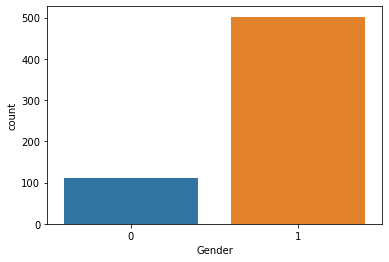

In [540]:
sns.countplot(Loan["Gender"])
#tells us the count of males and females in the gender attribute

<AxesSubplot:xlabel='Married', ylabel='Density'>

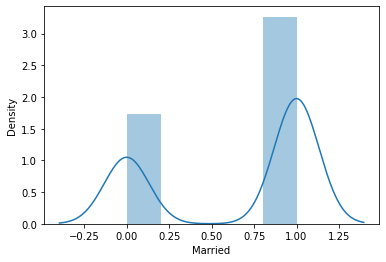

In [541]:
#lets perform analysis
sns.distplot(Loan["Married"])
#Skewness is present to the right

<AxesSubplot:xlabel='Dependents', ylabel='count'>

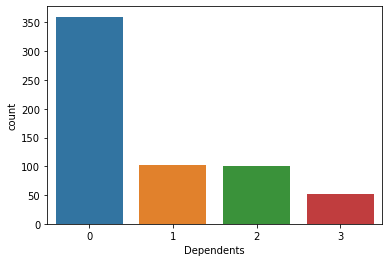

In [542]:
sns.countplot(Loan["Dependents"])
#tells us the count of dependents in the dependent attribute

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

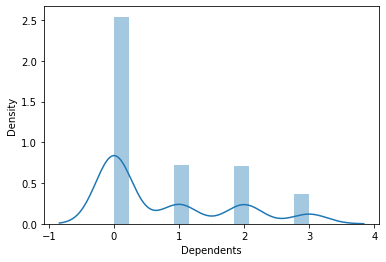

In [543]:
sns.distplot(Loan["Dependents"])
#skewness to the right is present

<AxesSubplot:xlabel='Education', ylabel='Density'>

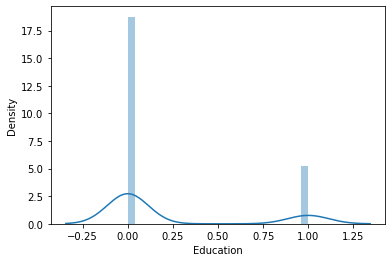

In [544]:
sns.distplot(Loan["Education"])
#skewness to the right is present

<AxesSubplot:xlabel='Education', ylabel='count'>

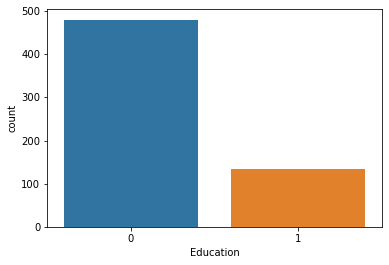

In [545]:
sns.countplot(Loan["Education"])
#tells us the count of graduates and non-graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

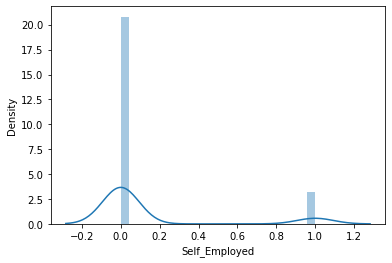

In [546]:
sns.distplot(Loan["Self_Employed"])
#skewness to the right is present

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

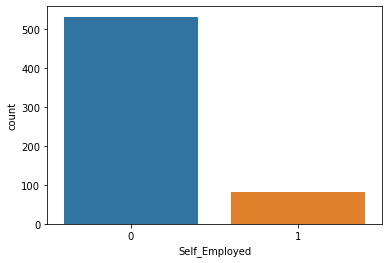

In [547]:
sns.countplot(Loan["Self_Employed"])
#tells us the count of self employed or not

<AxesSubplot:xlabel='ApplicantIncome'>

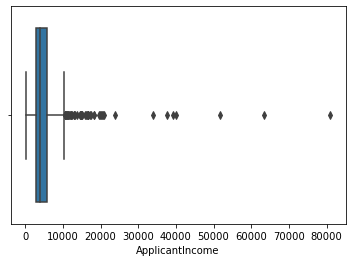

In [548]:
sns.boxplot(Loan["ApplicantIncome"])
#There are some outliers present

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

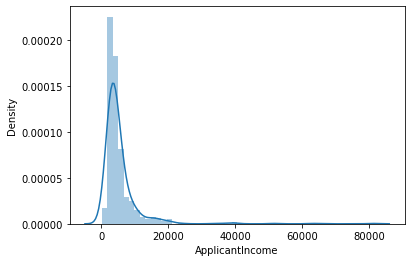

In [549]:
sns.distplot(Loan["ApplicantIncome"])
#skewness to the right is present

<AxesSubplot:xlabel='CoapplicantIncome'>

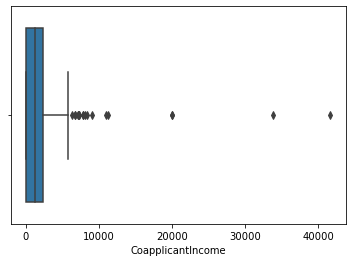

In [550]:
sns.boxplot(Loan["CoapplicantIncome"])
#There are some outliers present

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

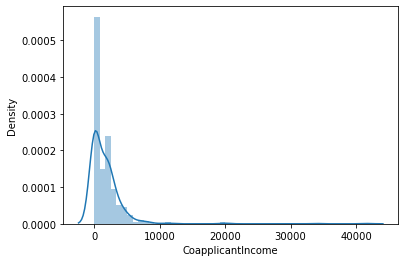

In [551]:
sns.distplot(Loan["CoapplicantIncome"])
#skewness to the right is present

<AxesSubplot:xlabel='LoanAmount'>

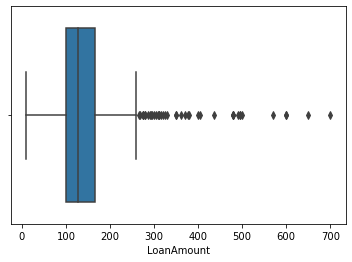

In [552]:
sns.boxplot(Loan["LoanAmount"])
#There are some outliers present

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

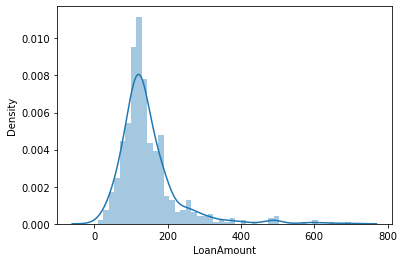

In [553]:
sns.distplot(Loan["LoanAmount"])
#skewness to the right is present

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

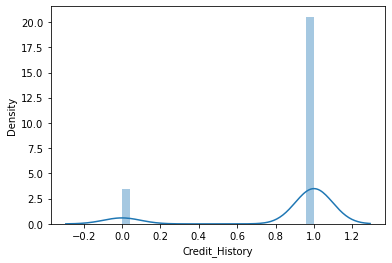

In [554]:
sns.distplot(Loan["Credit_History"])
#skewness to the right is present

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

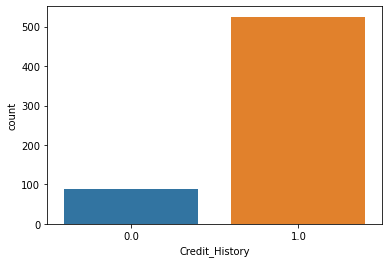

In [555]:
sns.countplot(Loan["Credit_History"])
#tells us the count of credit history 

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

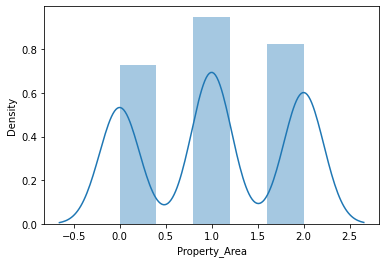

In [556]:
sns.distplot(Loan["Property_Area"])
#skewness to the right is present

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

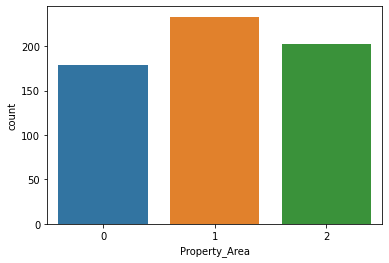

In [557]:
sns.countplot(Loan["Property_Area"])
#tells us the count of which area the property is in like urban,semi-urban or rural

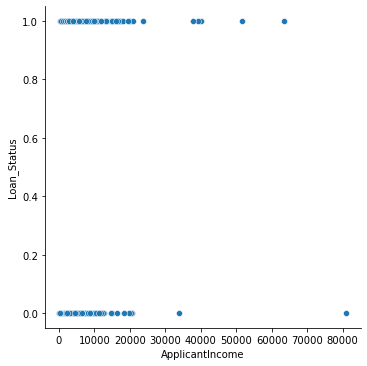

In [558]:
sns.relplot(x="ApplicantIncome",y="Loan_Status",kind="scatter",data=Loan)
#No concluion can be drawn

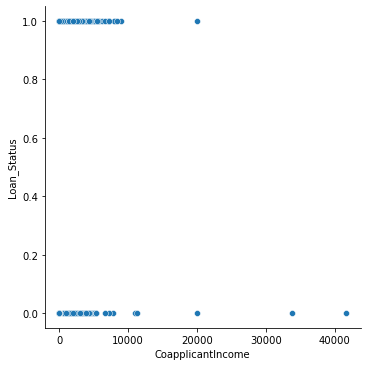

In [559]:
sns.relplot(x="CoapplicantIncome",y="Loan_Status",kind="scatter",data=Loan)
#No concluion can be drawn

In [560]:
#lets remove outliers using zscore method
zscore(Loan)

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
        -1.31851281, -1.48253724],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.41173269,
         1.22329839,  0.67451931],
       [-2.11710719, -1.37208932, -0.73780632, ..., -2.42876026,
        -0.04760721, -1.48253724]])

In [561]:
z=np.abs(zscore(Loan))

In [562]:
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [563]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [564]:
Loan_New=Loan[(z<3).all(axis=1)]

In [565]:
Loan_New.shape
#since data loss is around 6% we can persist with the new data set obtained by removing the outliers

(577, 12)

In [566]:
Loan_New.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [567]:
Loan_New["ApplicantIncome"]=power_transform(Loan_New["ApplicantIncome"].values.reshape(-1,1))

In [568]:
Loan_New["CoapplicantIncome"]=power_transform(Loan_New["CoapplicantIncome"].values.reshape(-1,1))

In [569]:
Loan_New["LoanAmount"]=power_transform(Loan_New["LoanAmount"].values.reshape(-1,1))

In [570]:
Loan_New["Loan_Amount_Term"]=power_transform(Loan_New["Loan_Amount_Term"].values.reshape(-1,1))

In [571]:
Loan_New["Credit_History"]=power_transform(Loan_New["Credit_History"].values.reshape(-1,1))

In [572]:
Loan_New.skew()
#skewness has been removed to a great extent

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [573]:
#before using machine learning lets separate x and y

In [574]:
x=Loan_New.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.000771,0.130788,0.418513,2
1,1,1,1,0,0,0.234783,0.744117,0.000771,0.130788,0.418513,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,0.130788,0.418513,2
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,0.130788,0.418513,2
4,1,0,0,0,0,0.728848,-1.122446,0.238260,0.130788,0.418513,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.293791,0.130788,0.418513,0
610,1,1,3,0,0,0.035386,-1.122446,-2.332692,-2.562700,0.418513,0
611,1,1,1,0,0,1.281658,0.173344,1.845015,0.130788,0.418513,2
612,1,1,2,0,0,1.164426,-1.122446,0.976055,0.130788,0.418513,2


In [575]:
y=Loan_New["Loan_Status"]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [576]:
#lets use standard scaler on x variables to standardise the values

In [577]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.13078824,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.13078824,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.13078824,
        -2.38941464, -0.03952504]])

In [578]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 11)
(174, 11)
(403,)
(174,)


#Now lets use four ML algos to select the best fit model:
1)Logistic Regression
2)KNN
3)Randomforest
4)Adaboost

In [579]:
#1) Logisticregression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict y values
pred1=lg.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(lg,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8563218390804598
[[ 27  24]
 [  1 122]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.84      0.99      0.91       123

    accuracy                           0.86       174
   macro avg       0.90      0.76      0.80       174
weighted avg       0.87      0.86      0.84       174

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


In [580]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8160919540229885
[[ 27   8]
 [ 24 115]]
              precision    recall  f1-score   support

           0       0.53      0.77      0.63        35
           1       0.93      0.83      0.88       139

    accuracy                           0.82       174
   macro avg       0.73      0.80      0.75       174
weighted avg       0.85      0.82      0.83       174

[0.78448276 0.75       0.77391304 0.85217391 0.7826087 ]
0.7886356821589204
0.034059213584029344


In [581]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8333333333333334
[[ 29   7]
 [ 22 116]]
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        36
           1       0.94      0.84      0.89       138

    accuracy                           0.83       174
   macro avg       0.76      0.82      0.78       174
weighted avg       0.87      0.83      0.84       174

[0.79310345 0.77586207 0.7826087  0.84347826 0.79130435]
0.7972713643178411
0.02392239903843158


In [582]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8333333333333334
[[ 29   7]
 [ 22 116]]
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        36
           1       0.94      0.84      0.89       138

    accuracy                           0.83       174
   macro avg       0.76      0.82      0.78       174
weighted avg       0.87      0.83      0.84       174

[0.75       0.75862069 0.7826087  0.82608696 0.8       ]
0.7834632683658171
0.02766917644742775


In [583]:
#The best fit model is knn. Let apply hyper tuning to this model

In [592]:
parameters={"n_neighbors":[5,10,2,20],"algorithm":["auto","ball_tree","kd_tree","brute"],"weights":["unifrom","distance"],"leaf_size":[10,30,50,75]}
rsearch=RandomizedSearchCV(knn,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 30, 50, 75],
                                        'n_neighbors': [5, 10, 2, 20],
                                        'weights': ['unifrom', 'distance']})

In [593]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')
{'weights': 'distance', 'n_neighbors': 20, 'leaf_size': 30, 'algorithm': 'ball_tree'}
0.7817901234567901


In [598]:
#lets put these best parameters back into the randomforest model

knn1=KNeighborsClassifier(algorithm="ball_tree",n_neighbors=20,weights="distance",leaf_size=30)
knn1.fit(x_train,y_train)
#lets predict y values
pred5=knn1.predict(x_test)
print(accuracy_score(pred5,y_test))

0.8563218390804598


In [599]:
y_pred_prob=rf1.predict_proba(x_test)[:,1]
y_pred_prob

array([0.32560605, 0.26105365, 0.84344255, 0.83612341, 0.74366691,
       0.65431257, 0.76142141, 0.67049934, 0.86293988, 0.82321231,
       0.67999319, 0.79340778, 0.78210554, 0.72018092, 0.29731488,
       0.80776323, 0.76087276, 0.80101084, 0.68324887, 0.70955713,
       0.6076871 , 0.72133866, 0.27141864, 0.79104941, 0.8628658 ,
       0.74477028, 0.75058179, 0.8088273 , 0.75681508, 0.77158758,
       0.78328327, 0.78517078, 0.73767382, 0.81562133, 0.74322265,
       0.83258704, 0.74073977, 0.81063307, 0.77596409, 0.79735205,
       0.76012387, 0.79175765, 0.87735285, 0.67339363, 0.67927299,
       0.83001242, 0.26369823, 0.76164979, 0.7891519 , 0.67755329,
       0.66912351, 0.78411455, 0.74730288, 0.77140695, 0.77399632,
       0.64064735, 0.84843328, 0.27919818, 0.64532084, 0.62129888,
       0.76507643, 0.84139082, 0.71988751, 0.66339187, 0.77057384,
       0.78862631, 0.65825999, 0.71271405, 0.60633532, 0.30085781,
       0.75789315, 0.8562284 , 0.73860666, 0.80458749, 0.34368

In [600]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.01960784 0.01960784 0.03921569
 0.03921569 0.05882353 0.05882353 0.07843137 0.07843137 0.09803922
 0.09803922 0.11764706 0.11764706 0.15686275 0.15686275 0.17647059
 0.17647059 0.19607843 0.19607843 0.21568627 0.21568627 0.23529412
 0.23529412 0.25490196 0.25490196 0.2745098  0.2745098  0.29411765
 0.29411765 0.31372549 0.31372549 0.33333333 0.33333333 0.35294118
 0.35294118 0.39215686 0.39215686 0.41176471 0.41176471 0.43137255
 0.43137255 0.45098039 0.45098039 0.49019608 0.49019608 0.54901961
 0.54901961 1.        ]
[0.         0.00813008 0.04878049 0.04878049 0.12195122 0.12195122
 0.27642276 0.27642276 0.36585366 0.36585366 0.37398374 0.37398374
 0.39837398 0.39837398 0.40650407 0.40650407 0.43089431 0.43089431
 0.43902439 0.43902439 0.45528455 0.45528455 0.46341463 0.46341463
 0.53658537 0.53658537 0.56097561 0.56097561 0.67479675 0.67479675
 0.68292683 0.68292683 0.76422764 0.76422764 0.80487805 0.80487805
 0.82926829 0.82926829 0.90243902 0.90

Text(0.5, 1.0, 'KNeighbors')

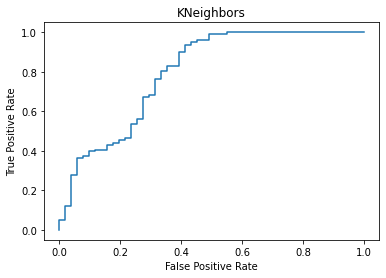

In [604]:
plt.plot(fpr,tpr,label="KNeighbors")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNeighbors")

In [603]:
#lets searlise and dump it for further use
joblib.dump(knn1,"knn1.obj")

['knn1.obj']